In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("soil.csv")

In [3]:
data.head()

,District,Block,Panchayath,SampleCode,FarmerName,ContactAddress,f_dateofsampling,f_sex,f_surveyno,f_latitude,...,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn,Zinc_Method,Copper_Method,Iron_Method,Manganese_Method
0,Thrissur,Anthikkad Block,Manaloor,TCR/TRS/MNL/215/3/182896,sunil.K.A,kunnath house\r\n Manaloor post,3/26/2011,male,215/3,0,...,34.40,8.09,0.59,48.20,9.45,21.32,HCl,HCl,HCl,HCl
1,Kottayam,Erattupetta Block,Melukavu,KTM/MNC/MLK/729/11/182897,T.M. Joseph,Valluvadikkal House\r\nKizhakkanmattom\r\n,3/18/2011,male,729/11,0,...,25.00,3.77,1.68,23.60,1.63,14.00,HCl,HCl,HCl,HCl
2,Kollam,Sasthamcotta Block,Kunnathur,KLM/KNT/KNT/60/6/182898,SUMANGALAAMMA,THENGANAYYATHU\r\nIVERKALA PADI NORTH\r\nPUTHA...,4/4/2011,female,60/6,0,...,0.77,6.89,0.53,2.99,0.83,6.80,HCl,HCl,HCl,HCl
3,Kottayam,Erattupetta Block,Melukavu,KTM/MNC/MLK/669/2/182899,P.V. Georgekutty,Paikadayil House\r\nKonnippadu P.O\r\n,3/18/2011,male,669/2,0,...,25.00,2.43,1.82,18.30,1.66,4.20,HCl,HCl,HCl,HCl
4,Thrissur,Anthikkad Block,Manaloor,TCR/TRS/MNL/918/1/182900,Abhilash,Thottupura house\r\n Manaloor post,3/26/2011,male,918/1,0,...,35.60,13.89,1.66,92.90,9.90,21.31,HCl,HCl,HCl,HCl


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
District            2000 non-null object
Block               2000 non-null object
Panchayath          2000 non-null object
SampleCode          2000 non-null object
FarmerName          2000 non-null object
ContactAddress      2000 non-null object
f_dateofsampling    2000 non-null object
f_sex               2000 non-null object
f_surveyno          2000 non-null object
f_latitude          2000 non-null int64
f_longitude         2000 non-null int64
f_ownership         2000 non-null object
f_ownername         0 non-null float64
f_panchayat         2000 non-null int64
f_pincode           546 non-null float64
f_district          2000 non-null int64
f_taluk             2000 non-null int64
f_block             2000 non-null int64
f_mob_no            387 non-null float64
SoilType            2000 non-null object
crop1               2000 non-null object
crop2               2000 non-null object

In [5]:
data.columns

Index(['District', 'Block', 'Panchayath', 'SampleCode', 'FarmerName',
       'ContactAddress', 'f_dateofsampling', 'f_sex', 'f_surveyno',
       'f_latitude', 'f_longitude', 'f_ownership', 'f_ownername',
       'f_panchayat', 'f_pincode', 'f_district', 'f_taluk', 'f_block',
       'f_mob_no', 'SoilType', 'crop1', 'crop2', 'crop3', 'Soil_pH', 'Soil_ec',
       'Soil_OrganicC', 'Soil_P', 'Soil_k', 'Soil_Ca', 'Soil_Mg', 'Soil_s',
       'Soil_Zn', 'Soil_b', 'Soil_Fe', 'Soil_Cu', 'Soil_Mn', 'Zinc_Method',
       'Copper_Method', 'Iron_Method', 'Manganese_Method'],
      dtype='object')

In [6]:
data[['f_ownership','f_ownername','f_panchayat','f_pincode','f_district','f_taluk','f_block','f_mob_no']].head()

,f_ownership,f_ownername,f_panchayat,f_pincode,f_district,f_taluk,f_block,f_mob_no
0,ownland,NaN,524,680617.0,8,41,111,NaN
1,ownland,NaN,294,NaN,5,24,63,NaN
2,ownland,NaN,143,NaN,2,8,29,NaN
3,ownland,NaN,294,NaN,5,24,63,NaN
4,ownland,NaN,524,680617.0,8,41,111,NaN


In [7]:
soil_cols=['Soil_pH','Soil_ec','Soil_OrganicC','Soil_P','Soil_k','Soil_Ca','Soil_Mg','Soil_s',
          'Soil_Zn','Soil_b','Soil_Fe','Soil_Cu','Soil_Mn']

In [8]:
method_cols=['Zinc_Method','Copper_Method','Iron_Method','Manganese_Method']

In [9]:
f_cols=['FarmerName','ContactAddress','f_dateofsampling','f_sex', 'f_surveyno','f_latitude', 'f_longitude', 'f_ownership', 'f_ownername',
       'f_panchayat', 'f_pincode', 'f_district', 'f_taluk', 'f_block','f_mob_no',]

In [10]:
data[soil_cols].mean()

Soil_pH            5.573874
Soil_ec            0.227181
Soil_OrganicC      1.206468
Soil_P            75.865930
Soil_k           209.237950
Soil_Ca          373.570914
Soil_Mg           51.942797
Soil_s            11.555962
Soil_Zn            5.680801
Soil_b             0.577789
Soil_Fe           68.614304
Soil_Cu            3.673857
Soil_Mn           23.975925
dtype: float64

## distribution of pH in different districts

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

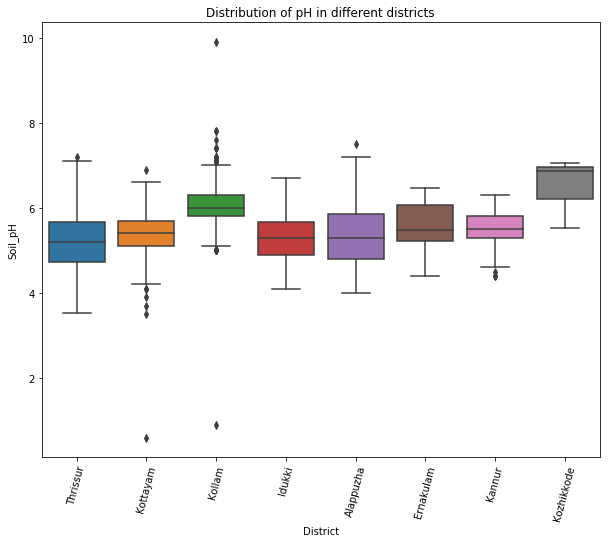

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_pH',data=data)
plt.title("Distribution of pH in different districts")
plt.xticks(rotation=75)

## kollam and kozhikode are slightly more basic comapared to other districts

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

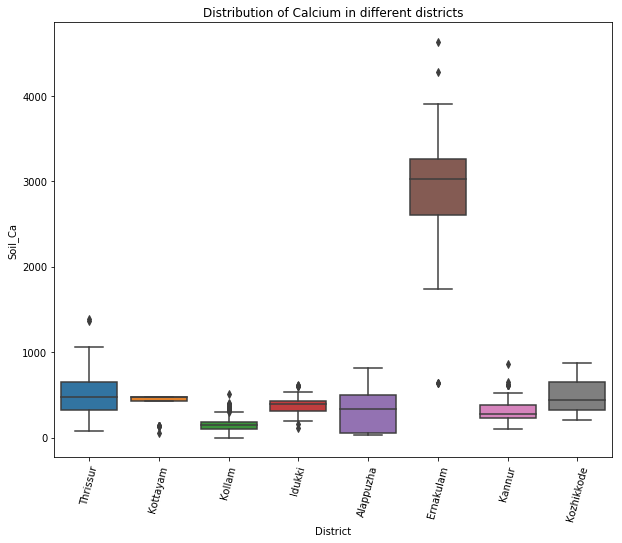

In [68]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_Ca',data=data)
plt.title("Distribution of Calcium in different districts")
plt.xticks(rotation=75)

## It is clear from the above plot that Ernakulam has large calcium content and kollam has less calcium content

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

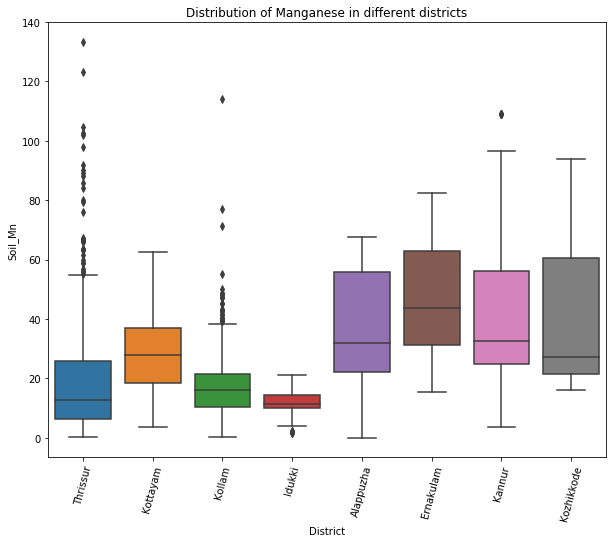

In [75]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_Mn',data=data)
plt.title("Distribution of Manganese in different districts")
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

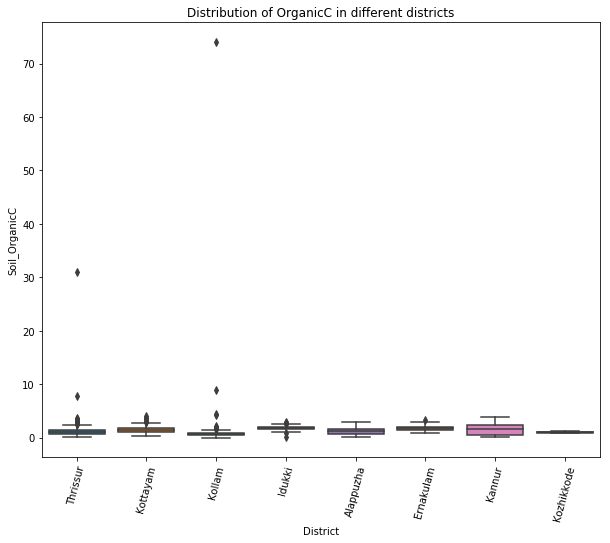

In [74]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_OrganicC',data=data)
plt.title("Distribution of OrganicC in different districts")
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

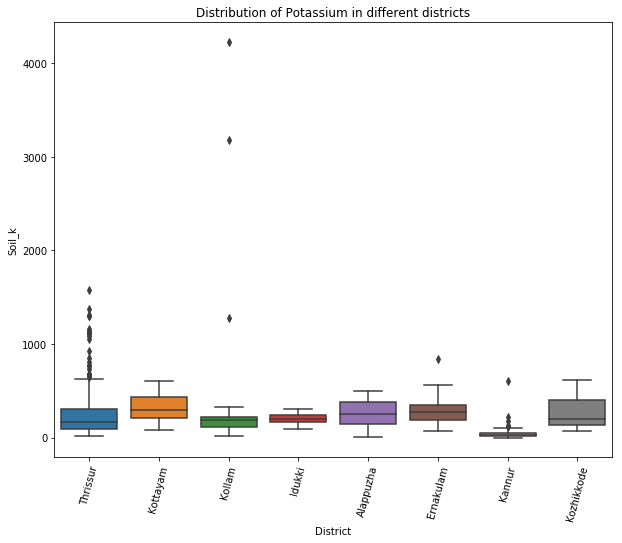

In [73]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_k',data=data)
plt.title("Distribution of Potassium in different districts")
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

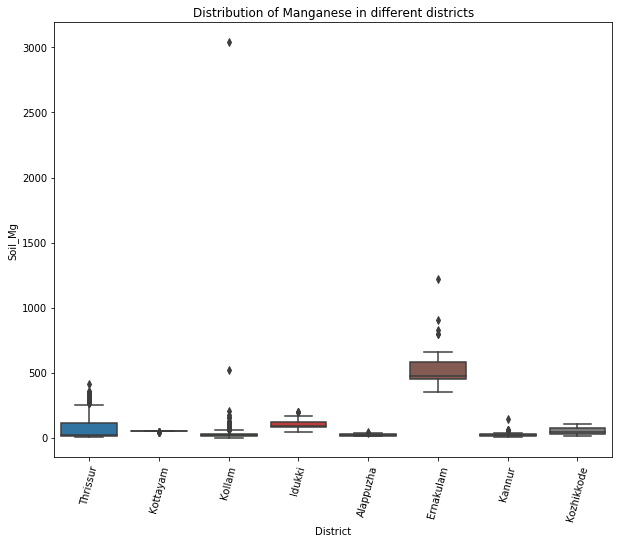

In [76]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_Mg',data=data)
plt.title("Distribution of Manganese in different districts")
plt.xticks(rotation=75)

## Ernakulam is having more magnesium content

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

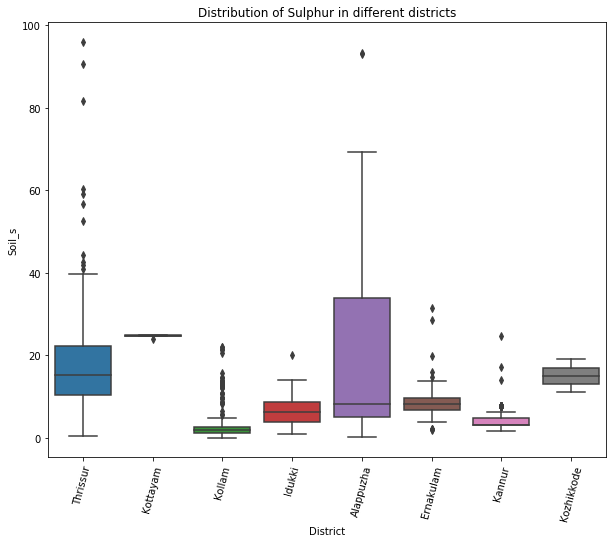

In [79]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_s',data=data)
plt.title("Distribution of Sulphur in different districts")
plt.xticks(rotation=75)

## From the above plot it is clear that Alappuzha district has wide speread of sulphut values , kottayam district has mostly not varying sulphur values

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

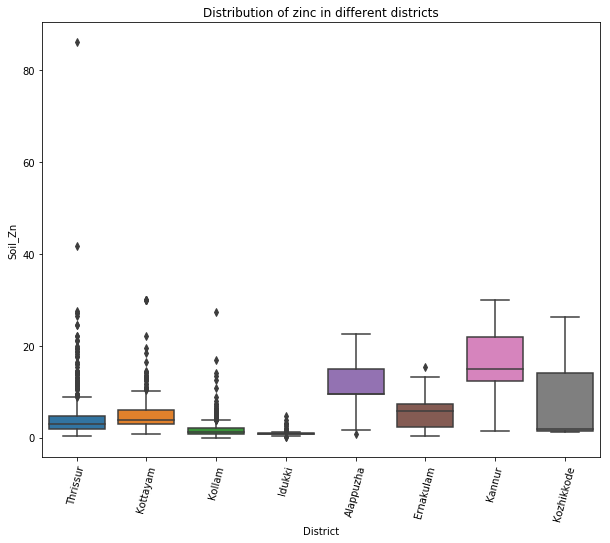

In [80]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_Zn',data=data)
plt.title("Distribution of zinc in different districts")
plt.xticks(rotation=75)

## Kannur district is having averagely high content in Zinc

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_s',data=data)
plt.title("Distribution of Sulphur in different districts")
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

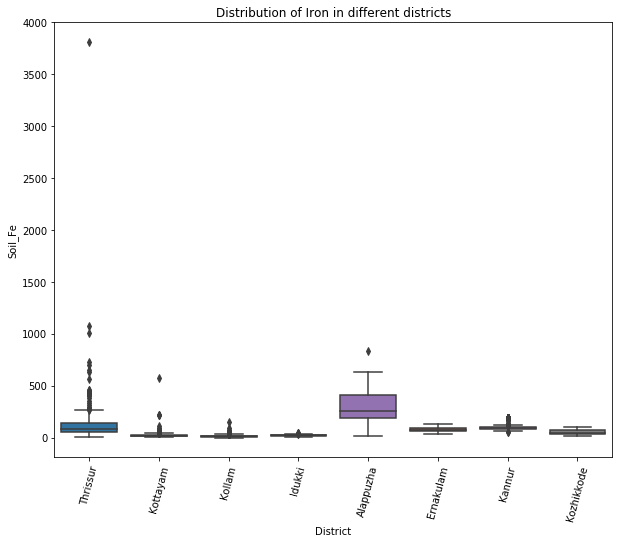

In [81]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_Fe',data=data)
plt.title("Distribution of Iron in different districts")
plt.xticks(rotation=75)

## Alappuzha is having highest iron content

(0, 20)

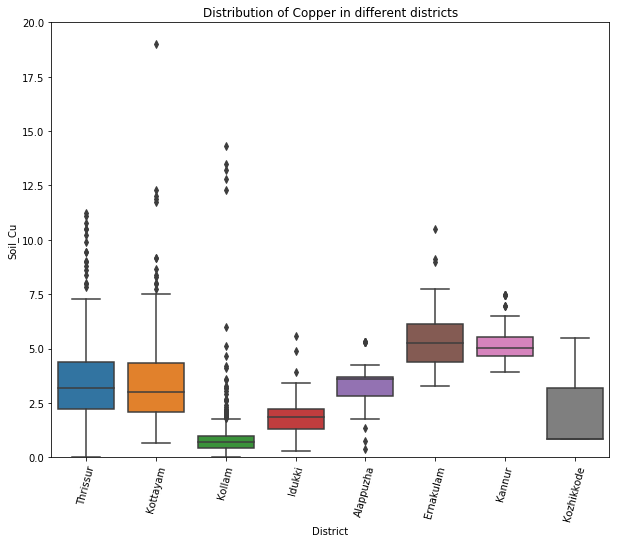

In [90]:
plt.figure(figsize=(10,8))
sns.boxplot(x='District',y='Soil_Cu',data=data)
plt.title("Distribution of Copper in different districts")
plt.xticks(rotation=75)
plt.ylim(0,20)

## 

## To see the correlations between chemicl content in soil, we check the scatter plots between each pairs

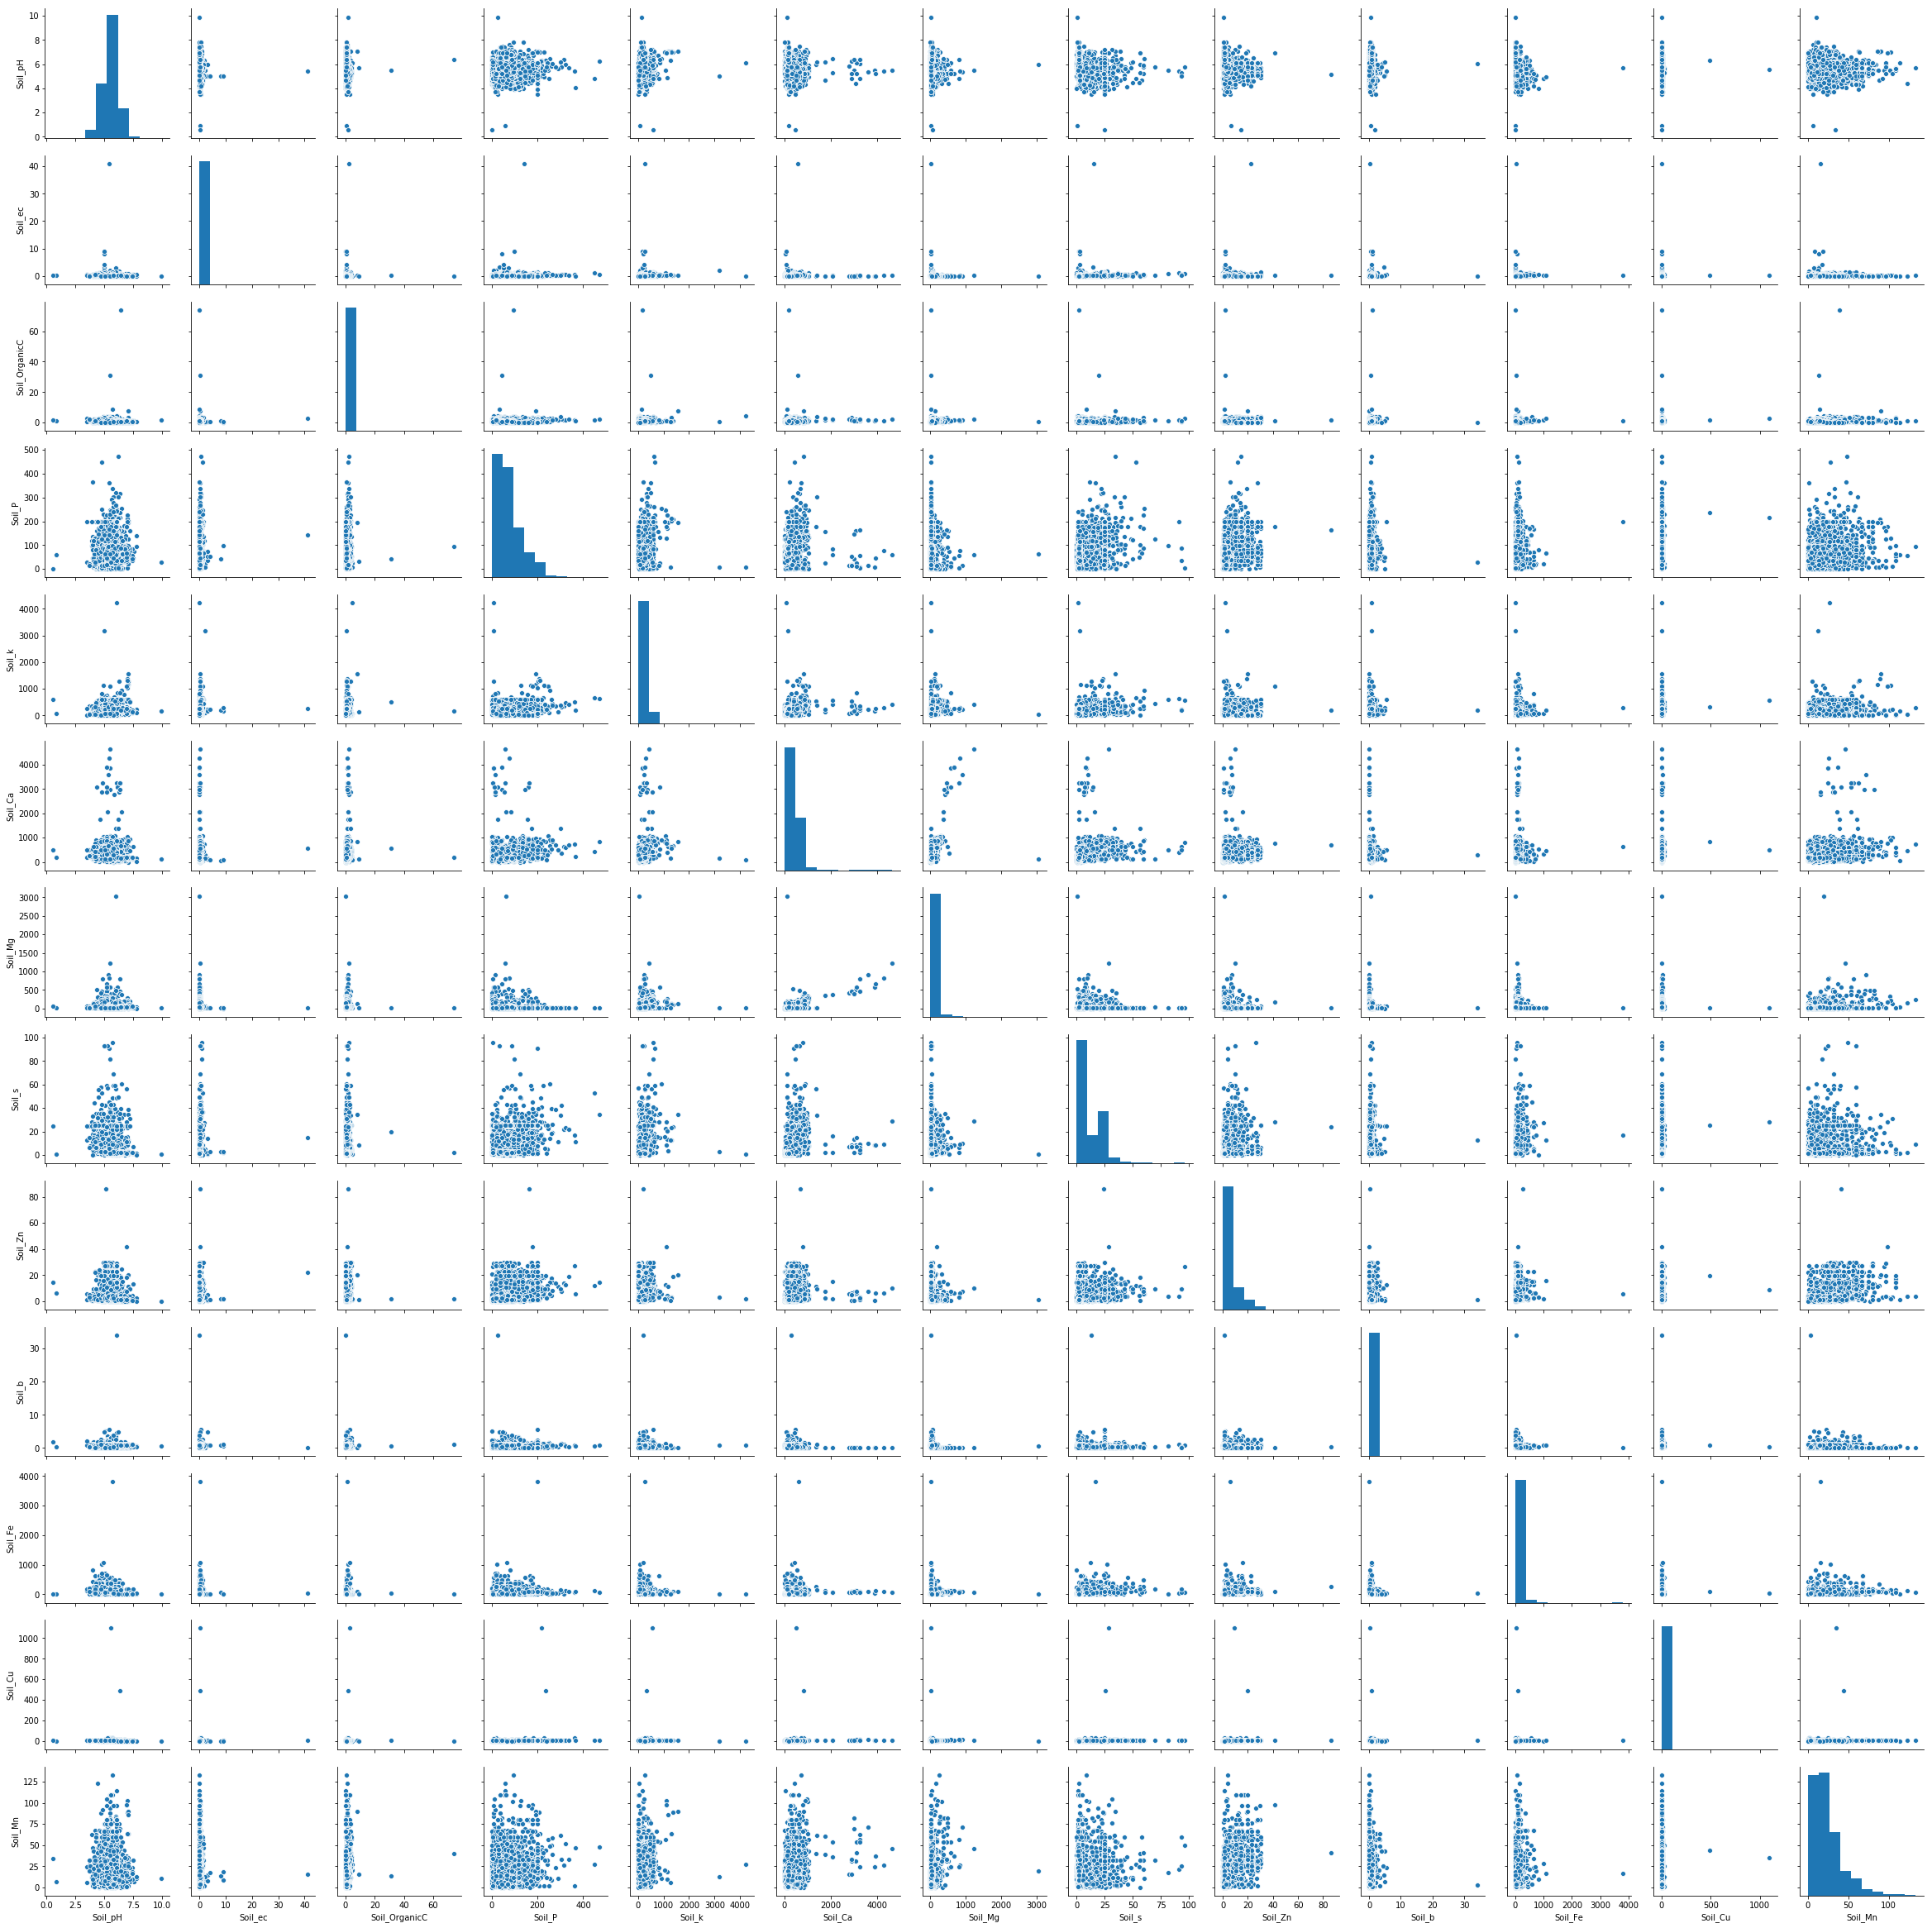

In [12]:
sns.pairplot(data[soil_cols])

## Principle component anaylsis for finding similarities in different districts

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
print(scaler.fit(data[soil_cols]))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [16]:
print(scaler.mean_)

[5.57387400e+00 2.27180550e-01 1.20646850e+00 7.58659300e+01
 2.09237950e+02 3.73570914e+02 5.19427970e+01 1.15559620e+01
 5.68080050e+00 5.77788750e-01 6.86143040e+01 3.67385750e+00
 2.39759250e+01]


In [17]:
standard_data=scaler.transform(data[soil_cols])

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(standard_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
transformed = pca.transform(standard_data)

In [22]:
print(transformed.shape)

(2000, 2)


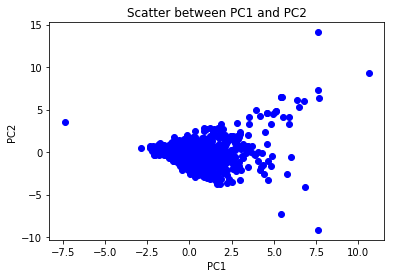

In [56]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys,c='blue')
plt.title("Scatter between PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [24]:
dist=data['District'].map({'Kollam':1,'Thrissur':2,'Kottayam':3,'Kannur':4,'Idukki':5,"Alappuzha":6,
                      'Ernakulam':7,"Kozhikkode":8})

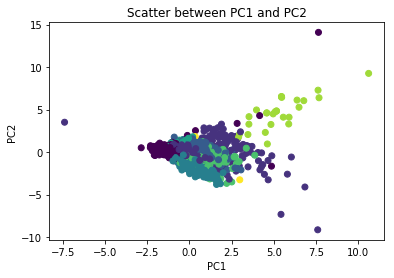

In [58]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys,c=dist)
plt.title("Scatter between PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.legend('upper left')
plt.show()

## Soil_pH vs Soil_Ca

Text(0, 0.5, 'Soil_Ca')

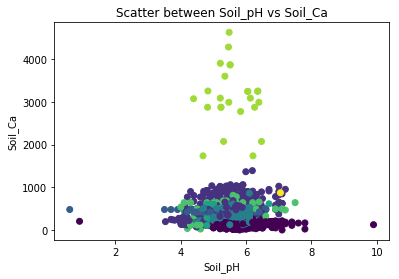

In [59]:
plt.scatter(data['Soil_pH'],data['Soil_Ca'],c=dist)
plt.title("Scatter between Soil_pH vs Soil_Ca")
plt.xlabel("Soil_pH")
plt.ylabel("Soil_Ca")

## Soil_Ca vs Soil_Mg

Text(0, 0.5, 'Soil_Ca')

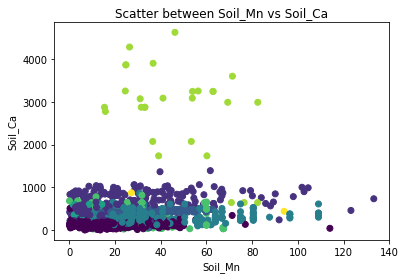

In [60]:
plt.scatter(data['Soil_Mn'],data['Soil_Ca'],c=dist)
plt.title("Scatter between Soil_Mn vs Soil_Ca")
plt.xlabel("Soil_Mn")
plt.ylabel("Soil_Ca")

In [28]:
mean=data.groupby('District')[soil_cols].mean()

In [29]:
mean

,Soil_pH,Soil_ec,Soil_OrganicC,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
District,,,,,,,,,,,,,
Alappuzha,5.415385,0.452967,1.198901,88.428571,261.043956,321.278022,20.465934,21.390110,11.577692,0.391648,293.083516,3.293407,34.683516
Ernakulam,5.579643,0.085000,1.747500,54.962857,300.371429,2836.732143,549.017857,9.716071,5.490714,0.012446,80.293929,5.558929,47.007500
Idukki,5.343947,0.207105,1.828333,69.885965,204.728070,382.979825,100.164912,6.535789,0.972719,0.586140,21.215965,1.913421,12.005702
Kannur,5.518081,0.034391,1.461181,79.625092,37.895941,298.730627,19.825646,3.825941,17.032841,0.275904,102.575646,5.100185,41.042804
Kollam,6.053657,0.182704,0.872571,60.852385,178.810334,148.077393,27.530277,2.428607,1.782514,0.796072,13.807564,0.951630,17.087583
Kottayam,5.376781,0.370513,1.478348,78.249801,331.629630,455.959111,51.813105,24.705413,5.278319,0.764929,22.965242,3.618405,28.564103
Kozhikkode,6.483333,0.413333,1.033333,111.333333,293.666667,503.666667,51.333333,15.000000,9.766667,0.740000,55.133333,2.406667,45.733333
Thrissur,5.223505,0.256569,1.129922,90.691365,239.662768,505.200780,66.670955,17.285127,4.725750,0.402651,119.263158,6.659318,19.643080


## Heatmap of Average Intensities of District wise , element content in soil

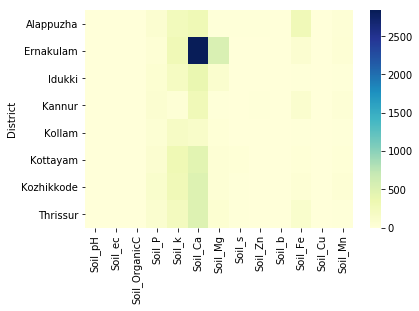

In [30]:
sns.heatmap(mean,cmap="YlGnBu")

## ernakulam calcium content in soil very high

## alappuzha fe(iron)  content is very high

## ernakulam magnesium content is very high

## kannur potassium is less compared to others

## percentage wise data points from districts

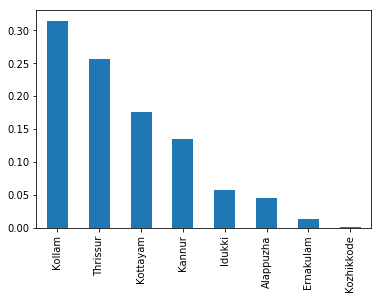

In [33]:
data['District'].value_counts(normalize=True).plot(kind='Bar')

In [35]:
crop_cols=['crop1', 'crop2', 'crop3']

In [61]:
data[crop_cols].head()

,crop1,crop2,crop3
0,Coconut(General),,
1,Tapioca,Elephant Yam,Colocasia
2,Rubber (Tapping),,
3,Elephant Yam,Tapioca,Colocasia
4,Areca nut 1st year,Banana Palayamkodan Rainfed,


## top crops in kerala

Text(0, 0.5, 'percentage')

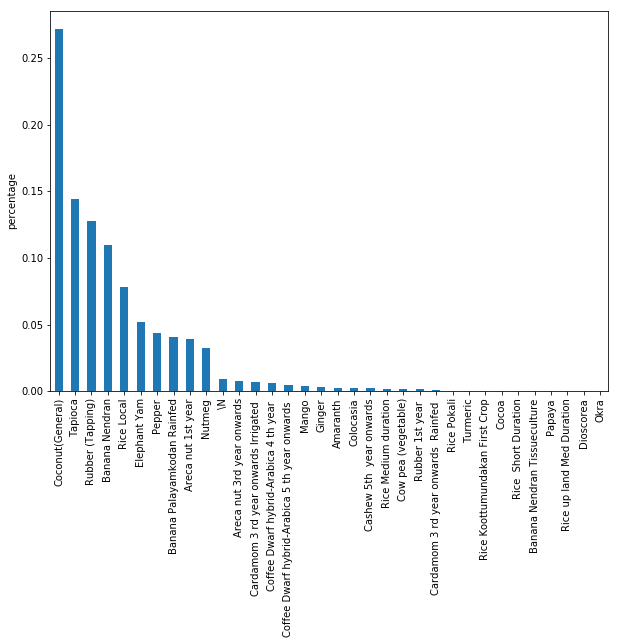

In [37]:
plt.figure(figsize=(10,7))
data['crop1'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('percentage')

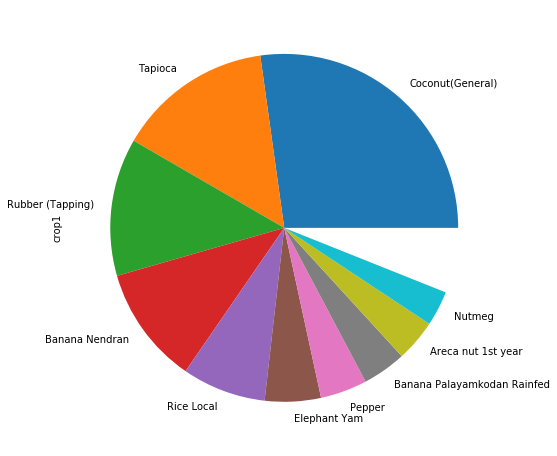

In [38]:
plt.figure(figsize=(10,8))
data['crop1'].value_counts(normalize=True).nlargest(10).plot(kind='pie')

## Grouping data based on crop to check is there any causal relationship

In [39]:
crop1_grouped=data.groupby("crop1")[soil_cols].agg(['mean'])

In [40]:
len(soil_cols)

13

In [41]:
data.columns

Index(['District', 'Block', 'Panchayath', 'SampleCode', 'FarmerName',
       'ContactAddress', 'f_dateofsampling', 'f_sex', 'f_surveyno',
       'f_latitude', 'f_longitude', 'f_ownership', 'f_ownername',
       'f_panchayat', 'f_pincode', 'f_district', 'f_taluk', 'f_block',
       'f_mob_no', 'SoilType', 'crop1', 'crop2', 'crop3', 'Soil_pH', 'Soil_ec',
       'Soil_OrganicC', 'Soil_P', 'Soil_k', 'Soil_Ca', 'Soil_Mg', 'Soil_s',
       'Soil_Zn', 'Soil_b', 'Soil_Fe', 'Soil_Cu', 'Soil_Mn', 'Zinc_Method',
       'Copper_Method', 'Iron_Method', 'Manganese_Method'],
      dtype='object')

In [42]:
crop1_grouped

,Soil_pH,Soil_ec,Soil_OrganicC,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
crop1,,,,,,,,,,,,,
Amaranth,5.348000,0.166000,0.920000,55.400000,269.200000,472.720000,12.600000,12.196000,2.196000,0.478000,46.800000,2.042000,6.500000
Areca nut 1st year,5.434103,0.157692,1.418590,112.871795,216.166667,466.403846,13.551282,17.674359,4.517308,0.577692,95.056410,9.182051,16.865897
Areca nut 3rd year onwards,5.568000,0.096667,1.776667,89.623333,278.678000,962.246667,228.553333,14.216667,10.196000,0.014867,105.286667,4.622000,32.372667
Banana Nendran,5.651644,0.197054,0.987324,66.266484,196.977534,358.187123,56.119059,8.645078,4.407763,0.571267,66.476292,2.174749,24.721872
Banana Nendran Tissueculture,5.100000,0.270000,1.100000,113.000000,503.000000,573.500000,12.000000,8.100000,3.100000,0.100000,74.300000,2.610000,15.100000
Banana Palayamkodan Rainfed,5.509111,0.237778,0.965185,127.888889,244.481481,515.570370,16.737037,20.401235,7.233210,0.566790,150.009877,17.286914,17.047531
Cardamom 3 rd year onwards Rainfed,5.950000,0.175000,1.950000,69.000000,199.500000,380.000000,73.000000,2.950000,0.700000,0.795000,18.200000,2.215000,11.115000
Cardamom 3 rd year onwards Irrigated,5.400000,0.197143,1.712143,76.714286,198.214286,388.642857,105.285714,7.867143,0.907857,0.601429,23.035714,1.797143,13.472857


In [43]:
crop1_grouped.max()

Soil_pH        mean      7.100000
Soil_ec        mean      0.807846
Soil_OrganicC  mean      2.560000
Soil_P         mean    152.875000
Soil_k         mean    503.000000
Soil_Ca        mean    962.246667
Soil_Mg        mean    228.553333
Soil_s         mean     35.600000
Soil_Zn        mean     28.525000
Soil_b         mean      1.072000
Soil_Fe        mean    387.466667
Soil_Cu        mean     17.286914
Soil_Mn        mean     50.500000
dtype: float64

In [44]:
crop1_grouped.loc['Rubber (Tapping)']

Soil_pH        mean      5.773750
Soil_ec        mean      0.121316
Soil_OrganicC  mean      1.248598
Soil_P         mean     58.697812
Soil_k         mean    108.391016
Soil_Ca        mean    214.486250
Soil_Mg        mean     35.698789
Soil_s         mean      2.593430
Soil_Zn        mean      6.417832
Soil_b         mean      0.568488
Soil_Fe        mean     42.266211
Soil_Cu        mean      2.257406
Soil_Mn        mean     25.157383
Name: Rubber (Tapping), dtype: float64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

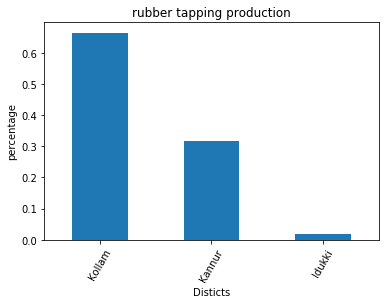

In [45]:
data[data['crop1']=='Rubber (Tapping)']['District'].value_counts(normalize=True).plot(kind='bar')
plt.title("rubber tapping production")
plt.xlabel("Disticts")
plt.ylabel("percentage")
plt.xticks(rotation=60)

## Kollam and Kannur are highest in rubber production

In [46]:
data[data['crop1']=='Rubber (Tapping)'][soil_cols].head()

,Soil_pH,Soil_ec,Soil_OrganicC,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
2,6.1,0.135,1.43,41.0,35.0,321.2,13.91,0.77,6.89,0.53,2.99,0.830,6.80
17,5.9,0.162,1.22,84.0,77.0,156.3,12.75,0.43,14.11,0.26,4.53,0.243,14.10
26,0.9,0.331,0.85,60.0,86.0,204.4,19.35,0.53,6.40,0.41,2.71,0.260,6.40
28,5.0,0.070,1.44,74.0,78.0,216.8,34.23,0.45,1.29,0.72,4.04,0.660,20.32
32,6.1,0.353,0.48,31.0,24.0,212.6,14.19,0.28,0.33,0.88,24.04,0.530,8.10


## one-way anova testing for pH

In [47]:
from scipy import stats

In [48]:
ph_dist=data[['District','Soil_pH']]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

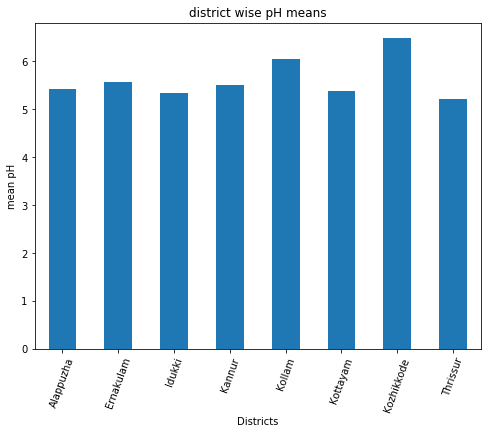

In [49]:
plt.figure(figsize=(8,6))
ph_dist.groupby('District')['Soil_pH'].mean().plot(kind='bar')
plt.title("district wise pH means")
plt.ylabel("mean pH")
plt.xlabel("Districts")
plt.xticks(rotation=70)

In [50]:
ph_groups=ph_dist.groupby('District')
#ph_dist.groupby('District').groups['Alappuzha']

In [51]:
stats.f_oneway(ph_groups.groups['Alappuzha'],ph_groups.groups['Ernakulam'],ph_groups.groups['Idukki'],
              ph_groups.groups['Kannur'],ph_groups.groups['Kollam'],ph_groups.groups['Kottayam'],
              ph_groups.groups['Kozhikkode'],ph_groups.groups['Thrissur'])

F_onewayResult(statistic=114.13127661362887, pvalue=5.604370845690677e-141)

## Since p-value is less than 0.05, we reject the null hypothesis that means are equal

## we will go for multiple comparisons

In [52]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

In [53]:
MultiComp = MultiComparison(ph_dist['Soil_pH'],ph_dist['District'])

In [54]:
print(MultiComp.tukeyhsd().summary())

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
Alappuzha  Ernakulam   0.1643  -0.2174  0.5459 False 
Alappuzha    Idukki   -0.0714  -0.3197  0.1768 False 
Alappuzha    Kannur    0.1027  -0.1113  0.3167 False 
Alappuzha    Kollam    0.6383   0.4402  0.8363  True 
Alappuzha   Kottayam  -0.0386  -0.2464  0.1691 False 
Alappuzha  Kozhikkode  1.0679   0.0316  2.1042  True 
Alappuzha   Thrissur  -0.1919  -0.3928  0.009  False 
Ernakulam    Idukki   -0.2357  -0.6082  0.1368 False 
Ernakulam    Kannur   -0.0616  -0.4121  0.289  False 
Ernakulam    Kollam    0.474    0.1329  0.8151  True 
Ernakulam   Kottayam  -0.2029  -0.5497  0.1439 False 
Ernakulam  Kozhikkode  0.9037  -0.1692  1.9766 False 
Ernakulam   Thrissur  -0.3561  -0.6989 -0.0134  True 
  Idukki     Kannur    0.1741   -0.023  0.3713 False 
  Idukki     Kollam    0.7097   0.5299  0.8895  True 
  Idukki    Kottayam   0.032

## one-way anova testing for Copper content

In [86]:
copper_dist=data[['District','Soil_Cu']]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

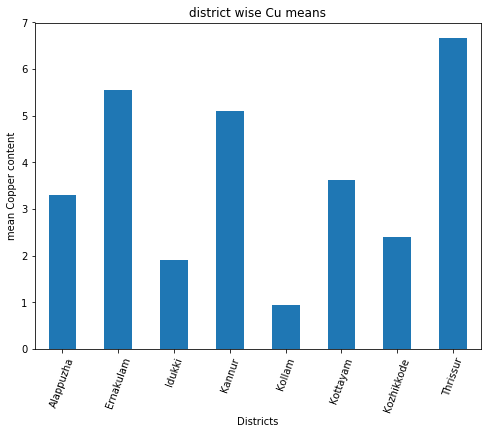

In [88]:
plt.figure(figsize=(8,6))
ph_dist.groupby('District')['Soil_Cu'].mean().plot(kind='bar')
plt.title("district wise Cu means")
plt.ylabel("mean Copper content")
plt.xlabel("Districts")
plt.xticks(rotation=70)

## still  continuing ...